# Assignment 1 - HW4 

In [1]:
from __future__ import print_function
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


 Assignment written by Federica B. Bianco @fedhere

 Assignment 1 Homework 4:

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

# 1. Chi-Squared Distribution

In [2]:
distributions = ['chisq']
mymean = 100
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

Text(0.5,1,'Chi sq distribution: df = 100, n=100')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


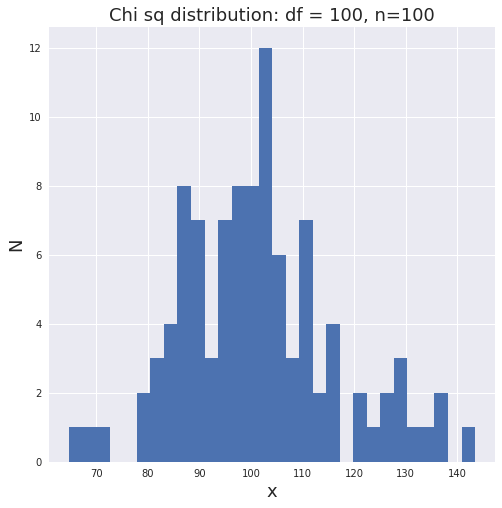

In [3]:
random.seed(1994)
md = {} # md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.figure(figsize=(8, 8))
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N', fontsize=18)
pl.xlabel('x', fontsize=18)
pl.title('Chi sq distribution: df = 100, n=100', fontsize=18)


### Figure 1: 
Chi sq distribution: df = 100, n=100

In [4]:
# Calculate what the mean and stdev of this distribution
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.36, standard deviation: 15.07


In [5]:
# Do the above for 100 Chi-sq distributions. 
# we want distributions of different sizes (all integers between 10 and 2000)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


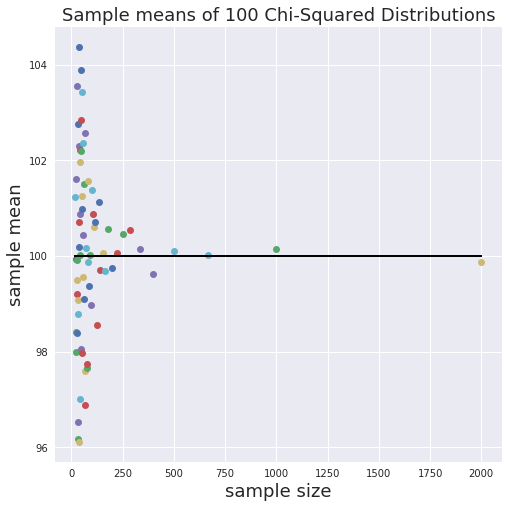

In [6]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(8,8)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Sample means of 100 Chi-Squared Distributions', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 2: 
We can see the law of large numbers here! We can see that there are a lot of points around 100, which is demonstrative of the CLT. The law of large numbers states that as a sample size grows, it's mean gets closer to the average of the whole population. We can see that in this chart. 

Text(0.5,1,'Distribution of sample means (Chiq-Squared distibutions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


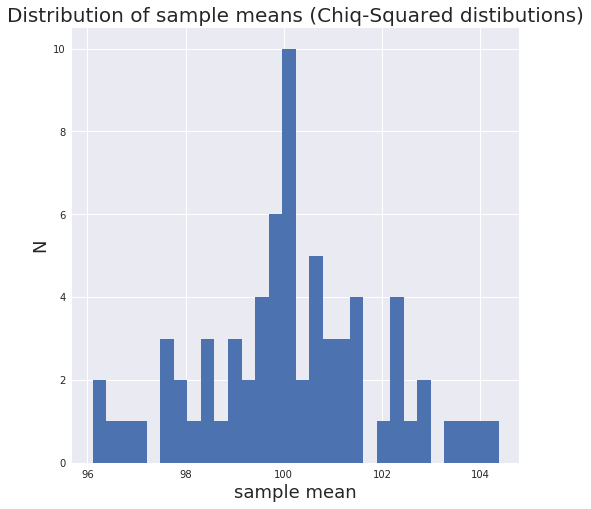

In [7]:
# Plot Histogram of the Mean of all samples. 
# Not incredibly pythonic, but gets the job done
# (don't use for big datasets)

allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of sample means (Chiq-Squared distibutions)', fontsize = 20)

### Figure 3: Histogram of the mean of the samples.
We can see the distribution of the sample mean for different levels of DF (degrees of freedom). 
We can see that this is consistent with findings from Figure 2

# 2. Poisson Distribution


In [8]:
# First, let's pick a random seed for reproducibility 
random.seed(1994)

# Let's look at our list of distributions again! 
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']

In [9]:
# We are told to have the same population mean for all 5 distributions,
# so let's stick with 100 like in the example. 

# Let's look here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html
# We need to choose Lambda of 100, which equals to the variable we defined as mymean_poisson
lambd = 100
lambd = mymean


Text(0.5,1,'Poisson distribution: lambda=100, N=100')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


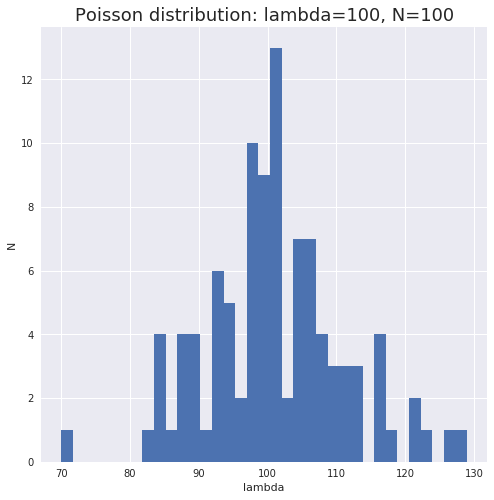

In [10]:
md = {}
md['pois'] = np.random.poisson(lambd, size=100) 
pl.figure(figsize=(8, 8))
pl.hist(md['pois'], bins = 35)
pl.ylabel('N')
pl.xlabel('lambda')
pl.title('Poisson distribution: lambda=100, N=100', fontsize=18)

### Figure 4: 
Poisson distribution: lambda=100, N=100

In [11]:
# Calculate mean and standard deviation of this distribution 
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 101.08, standard deviation: 10.14


In [12]:
# Now Let's do it for 100 Poisson Distribution 

# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
mysize = (np.random.rand(100) * 1000).astype(int)

print (mysize, mysize.shape)


[416  22 797 231 130 544 585 317 941 804 455 502 689 404 213 562 964 702
 795 600 594 446 520 886 868 528 388  20 756 979 486 555 446 832 560 172
 644 120  56 181 499 489 634 651 889 804 408 527   2 986 913 212 887 154
 912 532 166 980 940 701 942  28  66 497 920 663 639 978 217 382 499 932
 944 823 867 456 492 225   4  14 564 780 190 344 679 207 630 715 631 208
 442 945 762 234  14 308 614 508 587 202] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


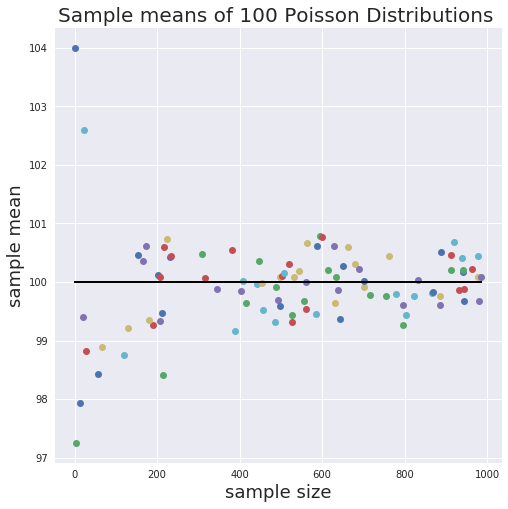

In [13]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)
#and do it in a for loop. not pythonic, but easily readable

md ['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(lambd, size = n)
    
    
# save the means for plotting later    
md['pois']['means'] = {}
axpois_lam_n = pl.figure(figsize=(8,8)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_lam_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_lam_n.set_xlabel('sample size', fontsize=18)
        axpois_lam_n.set_ylabel('sample mean', fontsize=18)
        axpois_lam_n.set_title('Sample means of 100 Poisson Distributions ', fontsize=20)
        axpois_lam_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')


### Figure 5: 
Again, we can see the CLT and law of large numbers at work here! As the number of trials increases, the sample mean  gets closer and closer to 100.

Text(0.5,1,'Distribution of sample means (Poisson distibutions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


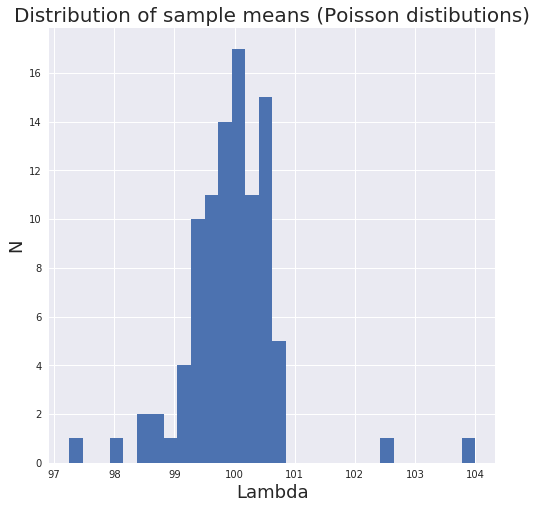

In [14]:
# Plotting the histogram of the mean of all samples
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('Lambda', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of sample means (Poisson distibutions)', fontsize = 20)

### Figure 6: 
We can see the distribution of the sample means for lambda=100. It appears a bit left-skewed, but still approximately normal with the mean of about 100 .

# 3. Log Normal Distribution

In [15]:
# First, let's pick a random seed for reproducibility 
random.seed(1994)

# Let's look at our list of distributions again! 
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['lnorm']

In [16]:
# We are told to have the same population mean for all 5 distributions,
# so let's stick with 100 like in the example. 

# Let's look here:
#  https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html
# the function has 3 parameters -- mean, sigma, size 
# Let's pick a mean of 4.55 and sigma of 0.008 *numbers picked through error & trial. I've been getting really high numbers when I picked real numbers like mu=3, sigma=1.* 
# Let's stick with size=100

m = 4.60
sig = 0.0067


Text(0.5,1,'Log Normal distribution: mean=4.6, Sigma=0.0067, N=100')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


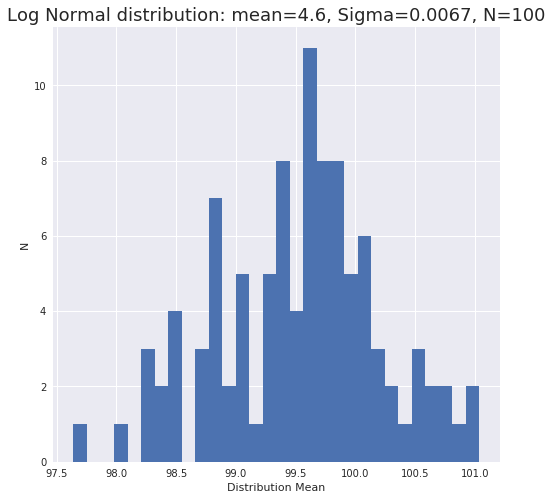

In [17]:
md = {}
# md is an empty disctionary
md['lnorm'] = np.random.lognormal(m, sig, size=100)
# md now is a dictionary with one object: an array by the key 'lnorm'
pl.figure(figsize=(8, 8))
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('Distribution Mean')
pl.title('Log Normal distribution: mean=4.6, Sigma=0.0067, N=100', fontsize=18)

### Figure 7:
Log Normal distribution: mean=4.6, Sigma=0.0067, N=100

In [18]:
# Calculate mean and standard deviation of this distribution 
print ("lnorm mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

lnorm mean: 99.52, standard deviation: 0.69


In [19]:
# Now Let's do it for 100 Log Normal Distributions

mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)


[521 623 818 661 775 672 966 199 746 307 101  94 686 546 746 512 868 868
 175 133 651 382 821 868 461 669 479 546 369 730 835 847 431 215 395 170
 486  76 992 703 285 363 558 112 926 842 275 741 455 663 682  62 576 202
 612  87 754 208 442 516 666 242 423 462 195 466 622 513 997 293 468 249
 209 824 481 337 429 308 714 251  94 539 397 839 893 964 125 654 964 941
 870 832 561 442 830 727 506 939 122 709] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


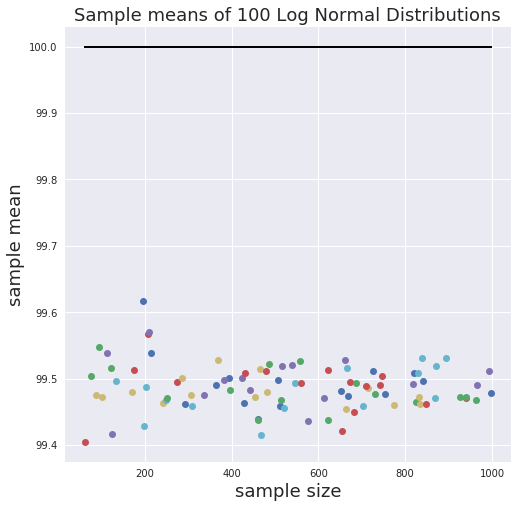

In [20]:
md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['lnorm'][n] = np.random.lognormal(m, sig, size = n)
    
# save the means for plotting later    
md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(8,8)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Sample means of 100 Log Normal Distributions', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [100, 100], 'k')

### Figure 8: Distribution of the mean. 

From this, it is hard to see the law of large numbers here! But if we zoomed out, we could see that the points converge near 100. The law states that the biggger the sample, the closer its mean is to the mean of the population (100)

Text(0.5,1,'Distribution of sample means (Log Normal distibutions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


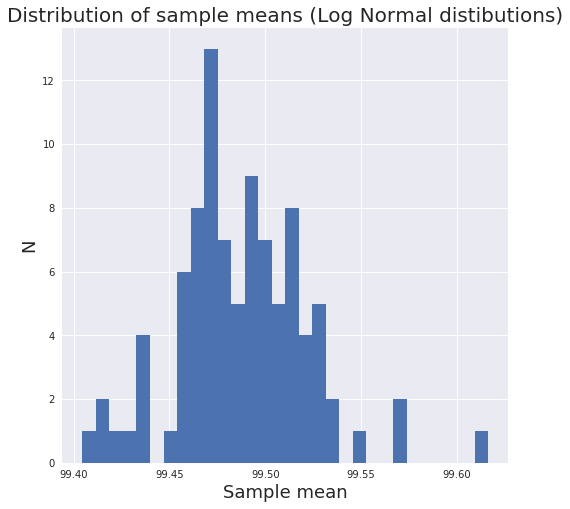

In [21]:
# Plotting the histogram of the mean of all samples
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of sample means (Log Normal distibutions)', fontsize = 20)

### Figure 9. We can see an approximately standard normal distribution here, so the Central Limit Theorem Holds

# 4. Binomial Distribution

In [22]:
# First, let's pick a random seed for reproducibility 
random.seed(1994)

# Let's look at our list of distributions again! 
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['binomial']

In [23]:
# We are told to have the same population mean for all 5 distributions,
# so let's stick with 100 like in the example. 

# Let's look here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.poisson.html
# The function takes two arguments: sample size n and probability of success p

# Let's do n=200 and p = 0.5. These should give a convenient mean! 

n = 200
p = 0.5

Text(0.5,1,'Binomial distribution: p:0.5, trials=200')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


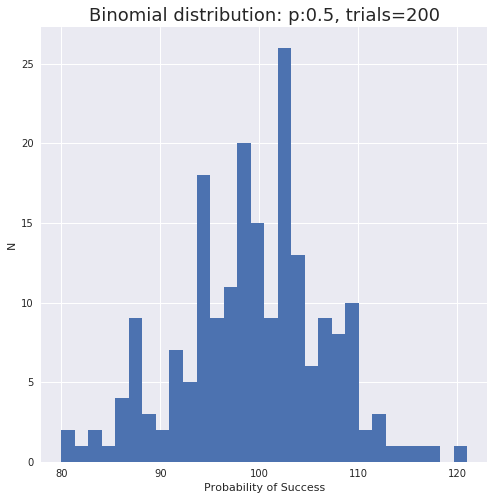

In [24]:
md = {}
# md is an empty disctionary
md['binomial'] = np.random.binomial(n,p, size=200)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.figure(figsize=(8, 8))
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('Probability of Success')
pl.title('Binomial distribution: p:0.5, trials=200', fontsize=18)

### Figure 10: Binomial distribution:
200 trials and 50% success

In [25]:
# Calculate mean and standard deviation of this distribution 
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.50, standard deviation: 7.25


In [26]:
# Now Let's do it for 100 Binom Distributions 

# mysize = (2000 / (np.array(range(1, 100)))).astype(int)
mysize = (np.random.rand(100) * 1000).astype(int)

print (mysize, mysize.shape)


[212 235 548 132 240 498 452 409 827  55 344 189  23 298 470 568 346 410
 423  89 988 230 572 812 335 631  85 501 645 834 806 660 839 129 480 680
 505 209 360 660 907  45 629 560 748 468 118 429 213 969  56 131  59 198
 978 128 711 604 195  88 313 727 987 566  43 693  24 245 275 421 908 604
 921 216 905 631 979 592 371 503 391 651 973 104 236 192 720 164 300 559
 473 680 241 122 138 183 533  13 315 866] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


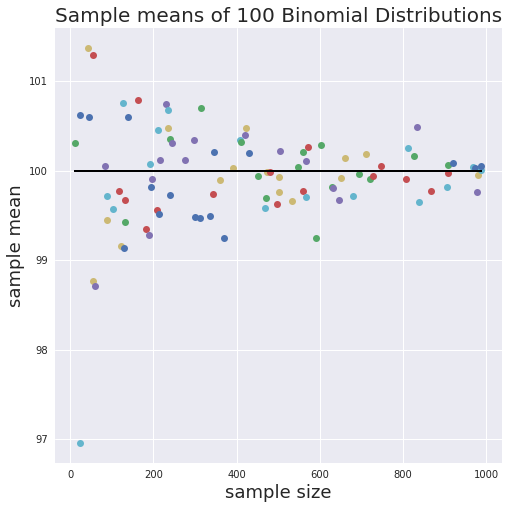

In [27]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)
#and do it in a for loop. not pythonic, but easily readable

md['binomial'] = {} 
for l in mysize:
    md['binomial'][l] = np.random.binomial(n,p, size=l)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_n_p = pl.figure(figsize=(8,8)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_n_p.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_n_p.set_xlabel('sample size', fontsize=18)
        axbinomial_n_p.set_ylabel('sample mean', fontsize=18)
        axbinomial_n_p.set_title('Sample means of 100 Binomial Distributions', fontsize=20)
        axbinomial_n_p.plot([min(mysize), max(mysize)], [100, 100], 'k')

### Figure 11: 

Again, we can see the CLT and law of large numbers at work here! As the number of trials increases, the sample mean gets closer and closer to 100

Text(0.5,1,'Distribution of sample means (Binomial distibutions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


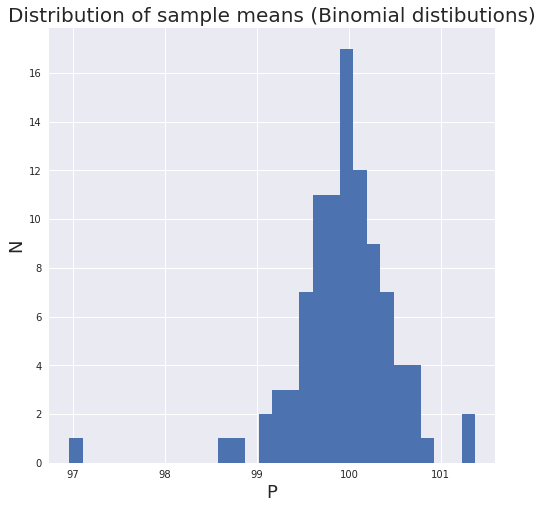

In [28]:
# Plotting the histogram of the mean of all samples

allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('P', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of sample means (Binomial distibutions)', fontsize = 20)

### Figure 12: Histogram of the mean of the samples, Binomial
This shows the distribution of the sample mean. It is looking a lot like a gaussian distribution.
We can see that this is consistent with findings from Figure 11 and that it is visually resembling the standard normal distribution.

# 5. Normal Distribution

In [29]:
# First, let's pick a random seed for reproducibility 
random.seed(1994)

# Let's look at our list of distributions again! 
# distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['gaus']

In [30]:
# We are told to have the same population mean for all 5 distributions,
# so let's stick with 100 like in the example. 

# Let's look here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

# We need to pick a value for mu=mean. 

mu = mymean
mu

100

Text(0.5,1,'Gaussian distribution: mu=100, n=100')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


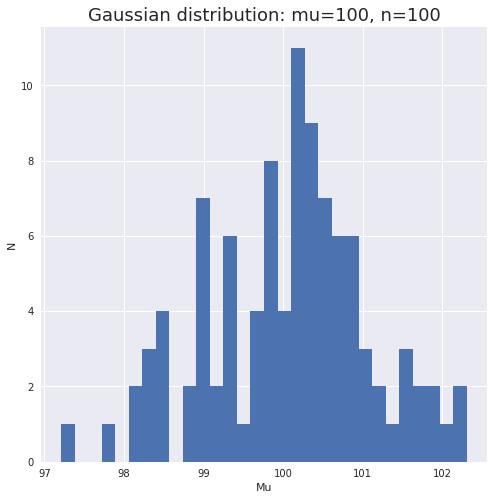

In [31]:
md = {}
md['gaus'] = np.random.normal(mu, size=100)
pl.figure(figsize=(8, 8))
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('Mu')
pl.title('Gaussian distribution: mu=100, n=100', fontsize=18)

### Figure 13: 
Gaussian distribution: mu=100, n=100

In [32]:
# Calculate mean and standard deviation of this distribution 
print ("Gaussian mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Gaussian mean: 100.06, standard deviation: 1.03


In [33]:
# Now Let's do it for 100 Gaussian Distributions
mysize = (np.random.rand(100) * 1000).astype(int)

print (mysize, mysize.shape)

[521 623 818 661 775 672 966 199 746 307 101  94 686 546 746 512 868 868
 175 133 651 382 821 868 461 669 479 546 369 730 835 847 431 215 395 170
 486  76 992 703 285 363 558 112 926 842 275 741 455 663 682  62 576 202
 612  87 754 208 442 516 666 242 423 462 195 466 622 513 997 293 468 249
 209 824 481 337 429 308 714 251  94 539 397 839 893 964 125 654 964 941
 870 832 561 442 830 727 506 939 122 709] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


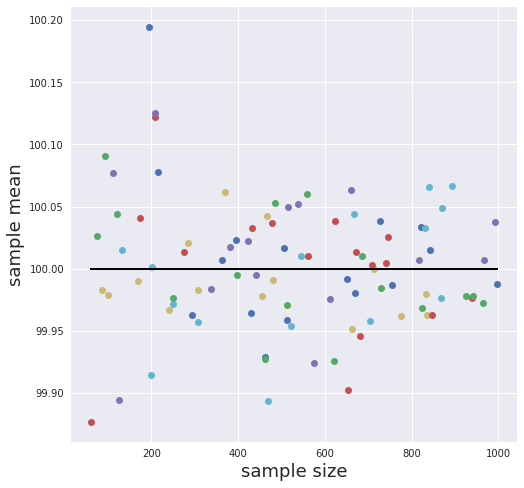

In [34]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)
#and do it in a for loop. not pythonic, but easily readable

md['gaus'] = {} 

for n in mysize:
    md['gaus'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(8,8)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_n_p.set_title('Sample means of 100 Gaussian Distributions', fontsize=20)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 14: 

Again, we can see the CLT and law of large numbers at work here! As the number of trials increases, the sample mean gets closer and closer to 100.

Text(0.5,1,'Distribution of sample means (Normal distibutions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


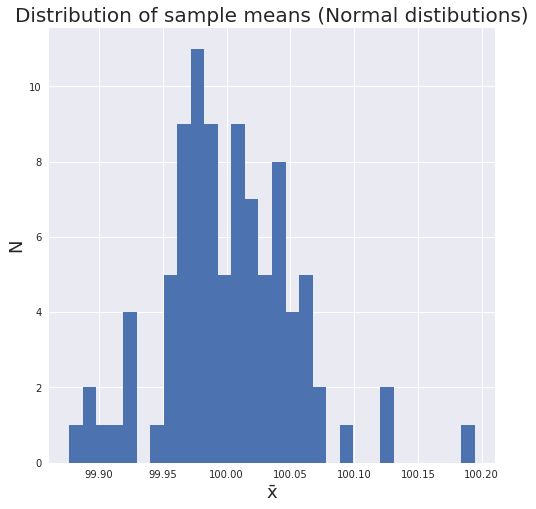

In [35]:
# Plotting the histogram of the mean of all samples

allmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=30)
pl.xlabel('x̄', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of sample means (Normal distibutions)', fontsize = 20)

### Figure 15: 

We can see the distribution of the sample means for sample x̄=100. We can see the standard normal dirstibution once again! 



##### END OF NOTEBOOK